In [ ]:
import pandas as pd
df = pd.read_csv("/content/travel insurance.csv")

df


,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import re
import io

PRE PROCESSING DATASET

In [ ]:
sns.set(style="whitegrid")

df = pd.read_csv("/content/travel insurance.csv")

df = df.dropna()

df['Claim'] = df['Claim'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

df = df.drop(columns=['Agency', 'Product Name', 'Destination'])
print("Shape after dropping NaNs:", df.shape)
df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=['Claim'])
y = df['Claim']

Shape after dropping NaNs: (18219, 8)


<ipython-input-40-c21a5b66ee49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Claim'] = df['Claim'].map({'Yes': 1, 'No': 0})
<ipython-input-40-c21a5b66ee49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})


TRAIN-TEST SPLIT + SCALING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (5466, 7)
y_test shape: (5466,)


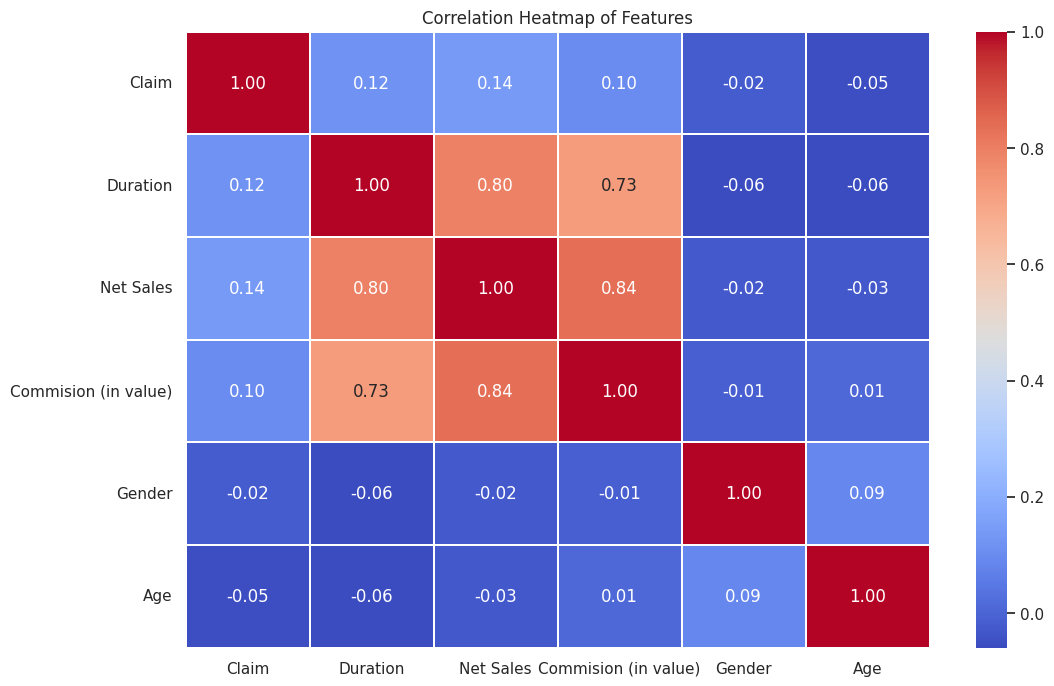

In [ ]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.2)
plt.title("Correlation Heatmap of Features")
plt.show()

<ipython-input-45-c1cebee1ca2a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Claim', palette='viridis')


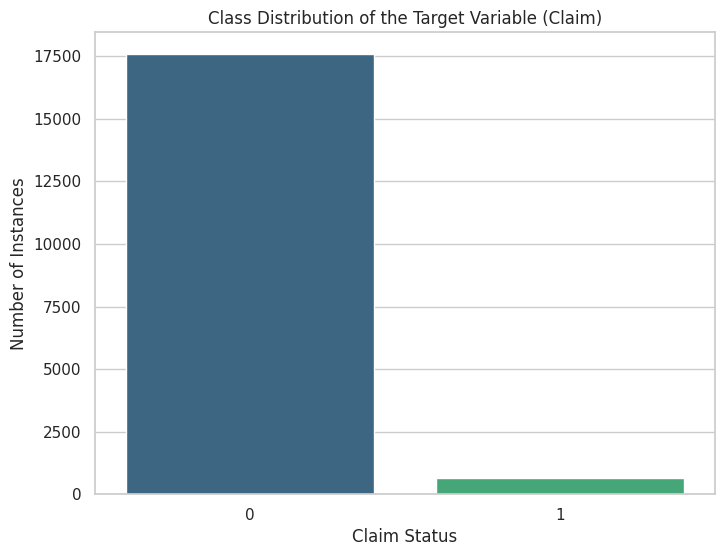

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Claim', palette='viridis')
plt.title("Class Distribution of the Target Variable (Claim)")
plt.xlabel("Claim Status")
plt.ylabel("Number of Instances")
plt.show()

TRAIN NEURAL NETWORK

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9308 - loss: 0.2810 - val_accuracy: 0.9569 - val_loss: 0.1654
Epoch 2/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9614 - loss: 0.1566 - val_accuracy: 0.9569 - val_loss: 0.1645
Epoch 3/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9660 - loss: 0.1406 - val_accuracy: 0.9569 - val_loss: 0.1647
Epoch 4/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9658 - loss: 0.1391 - val_accuracy: 0.9569 - val_loss: 0.1621
Epoch 5/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9647 - loss: 0.1422 - val_accuracy: 0.9569 - val_loss: 0.1629
Epoch 6/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9686 - loss: 0.1271 - val_accuracy: 0.9569 - val_loss: 0.1588
Epoch 7/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9669 - loss: 0.1335 - val_accuracy: 0.9569 - val_loss: 0.1589
Epoch 8/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9646 - loss: 0.1392 - val_accuracy: 0.9569 - val_

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


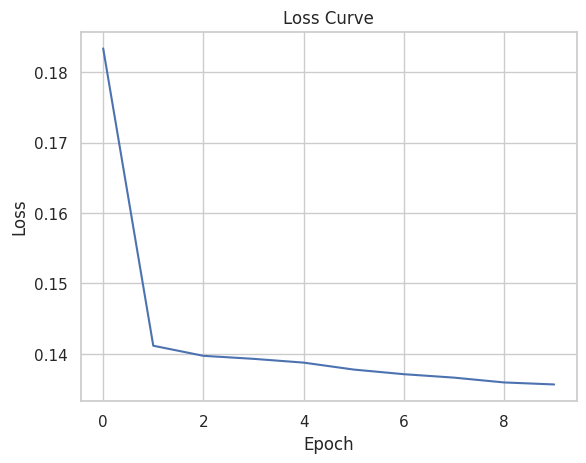

Testing Error: 0.14
Confusion Matrix:
[[5274    0]
 [ 192    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5274
           1       0.00      0.00      0.00       192

    accuracy                           0.96      5466
   macro avg       0.48      0.50      0.49      5466
weighted avg       0.93      0.96      0.95      5466



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


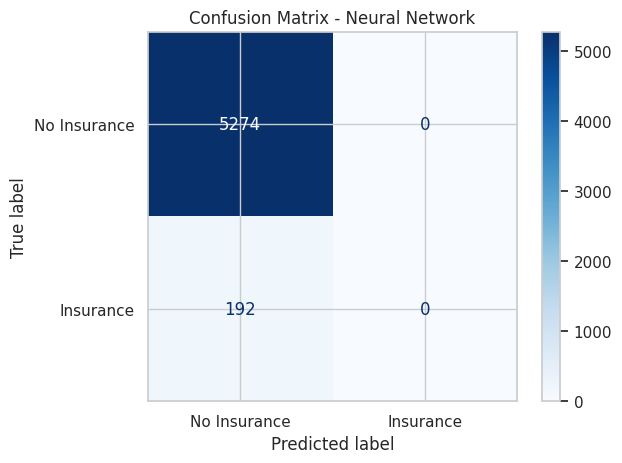

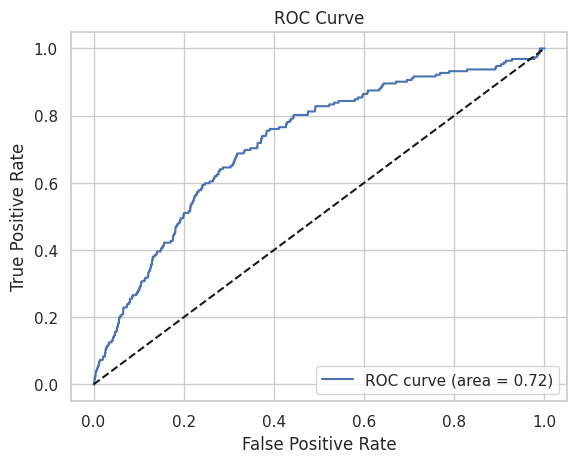

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = Sequential([
  Flatten(input_shape=(X_train_scaled.shape[1],)),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
  loss=BinaryCrossentropy(),
  metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

y_pred_probs = model.predict(X_test_scaled).ravel()
y_pred_mlp = (y_pred_probs > 0.5).astype(int)

mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_precision = precision_score(y_test, y_pred_mlp)
mlp_recall = recall_score(y_test, y_pred_mlp)
mlp_auc = roc_auc_score(y_test, y_pred_probs)

# Output results
print("\nNeural Network Results:")
print(f"Accuracy: {mlp_accuracy}")
print(f"Precision: {mlp_precision}")
print(f"Recall: {mlp_recall}")
print(f"AUC: {mlp_auc}")

# Plot loss curve
plt.plot(history.history['loss'])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Evaluate model on test data (loss)
test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)[0]
print(f"Testing Error: {round(test_loss, 2)}")

# Confusion matrix and classification report
mlp_cm = confusion_matrix(y_test, y_pred_mlp)
mlp_report = classification_report(y_test, y_pred_mlp)
print(f"Confusion Matrix:\n{mlp_cm}")
print(f"Classification Report:\n{mlp_report}")

# Display confusion matrix
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=['No Insurance', 'Insurance'])
disp_mlp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Neural Network')
plt.show()

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

TRAIN DECISION TREE MODEL

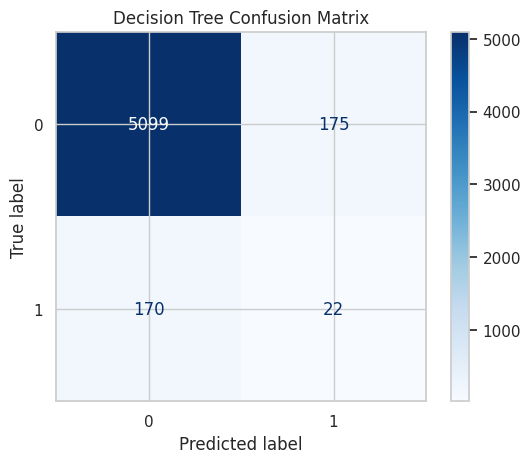


Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5274
           1       0.11      0.11      0.11       192

    accuracy                           0.94      5466
   macro avg       0.54      0.54      0.54      5466
weighted avg       0.94      0.94      0.94      5466


Accuracy Score: 0.9369

AUC Score: 0.5408


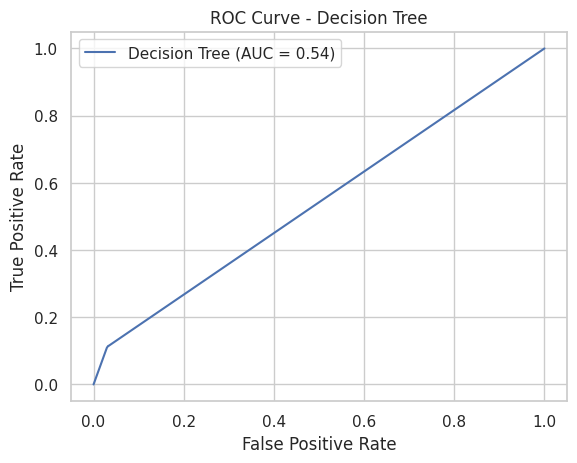

In [ ]:
# Train the Decision Tree model with class balancing
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_dt_pred = dt_model.predict(X_test_scaled)
y_dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
dt_conf_matrix = confusion_matrix(y_test, y_dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_conf_matrix)
disp.plot(cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Classification Report
print("\nDecision Tree:")
print(classification_report(y_test, y_dt_pred))

# Accuracy Score
dt_accuracy = accuracy_score(y_test, y_dt_pred)
print(f"\nAccuracy Score: {dt_accuracy:.4f}")

# ROC and AUC
dt_fpr, dt_tpr, _ = roc_curve(y_test, y_dt_probs)
dt_auc = auc(dt_fpr, dt_tpr)
print(f"\nAUC Score: {dt_auc:.4f}")

# Plot ROC Curve
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


TRAIN LOGISTIC REGRESSION


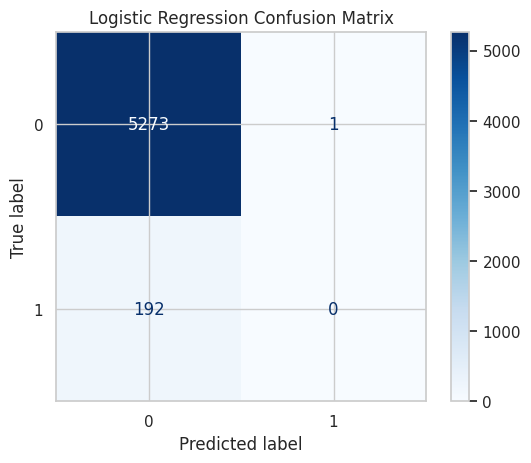


Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5274
           1       0.00      0.00      0.00       192

    accuracy                           0.96      5466
   macro avg       0.48      0.50      0.49      5466
weighted avg       0.93      0.96      0.95      5466


Accuracy Score: 0.9647

AUC Score: 0.6949


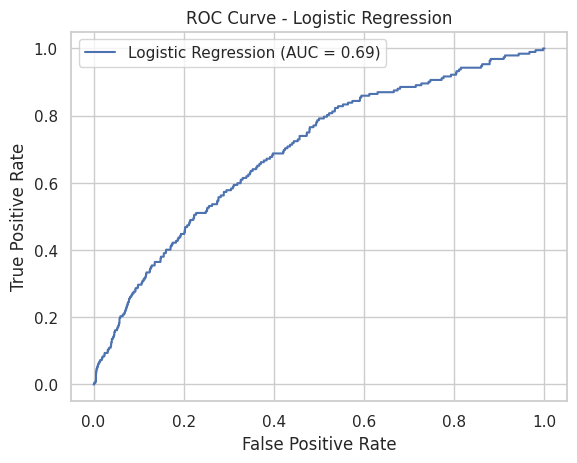

In [ ]:
# Train Logistic Regression model
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train_scaled, y_train)

# Make predictions
y_log_pred = log_model.predict(X_test_scaled)
y_log_probs = log_model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
log_conf_matrix = confusion_matrix(y_test, y_log_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=log_conf_matrix)
disp.plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Classification Report
print("\nLogistic Regression:")
print(classification_report(y_test, y_log_pred))

# Accuracy Score
log_accuracy = accuracy_score(y_test, y_log_pred)
print(f"\nAccuracy Score: {log_accuracy:.4f}")

# ROC and AUC
log_fpr, log_tpr, _ = roc_curve(y_test, y_log_probs)
log_auc = auc(log_fpr, log_tpr)
print(f"\nAUC Score: {log_auc:.4f}")

# Plot ROC Curve
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {log_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


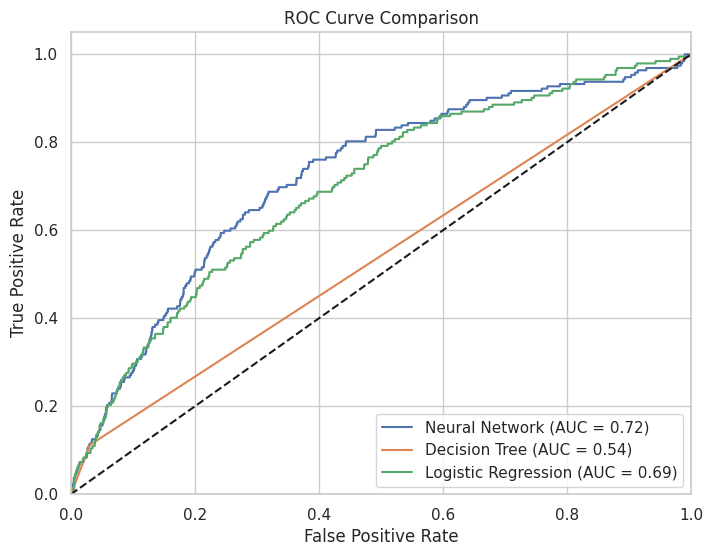

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for each model
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_probs)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_dt_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_log, tpr_log, _ = roc_curve(y_test, y_log_probs)
roc_auc_log = auc(fpr_log, tpr_log)

# Plot all ROC curves in one plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, label=f'Neural Network (AUC = {roc_auc_mlp:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


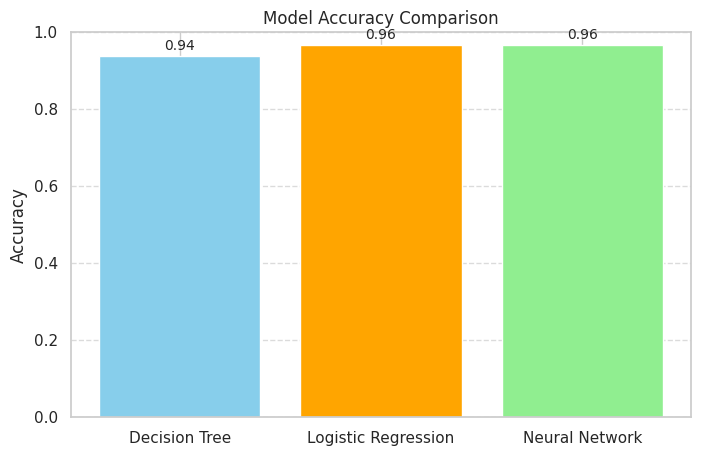

In [ ]:
import matplotlib.pyplot as plt

# Model names and their respective accuracy scores
models = ['Decision Tree', 'Logistic Regression', 'Neural Network']
accuracies = [dt_accuracy, log_accuracy, mlp_accuracy]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'orange', 'lightgreen'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with accuracy values
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f'{acc:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()
